<a href="https://colab.research.google.com/github/Ayoubkassi/Twitter_Comercial_Segments/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install pycountry-convert

# I- Installing libraries 

In [2]:
from nltk.corpus import stopwords
import nltk
import re
from wordcloud import WordCloud

import pycountry_convert as pc


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter



# II- Importing the datasets

In [3]:
Tweets_data = pd.read_csv('data/i_want_an_iphone_after_+10500.csv')
Users_data = pd.read_csv('data/i_want_an_iphone_after_+10500_users_with_gender.csv')

# Creating a copy of the users data to use for the second approach of our continent detection algorithm
Users_data2 = Users_data.copy()

### II-1 looking to our datasets

In [4]:
Tweets_data.head()

,Username,Name,PostDate,TweetText,ReplyCount,RetweetCount,LikeCount,Views
0,@andrechemist,Andre the Chemist,27 Feb 2023,I just remembered when I went to buy an iPhon...,5,9,106,11.7K
1,@UnicornPimpcess,Shaylee,28 Feb 2023,I want my childhood and an iPhone nano back,NaN,NaN,NaN,NaN
2,@iwantaniphonexs,iPhone XS ,27 Feb 2023,I want an iPhone XS.,NaN,NaN,NaN,NaN
3,@CabbitBrat,Cabbit ENVtuber,27 Feb 2023,It's like as much as I want an IPhone for m...,NaN,NaN,NaN,NaN
4,@Farahlived,Farah Gabrielle,27 Feb 2023,I want an iPhone with BBM and a Nokia batte...,NaN,NaN,NaN,NaN


In [5]:
Users_data.head()

,type,dateCreated,username,givenName,description,location,follows,friends,tweets,gender
0,ProfilePage,2017-09-17T00:21:27.000Z,spinachlsgna,biskita enthusiast,passionate about cars and destroying them for ...,NaN,29,404,1343,uknown
1,ProfilePage,2017-04-18T16:29:55.000Z,desifactsbot,Desifacts,Biryani,NaN,3,0,3769,uknown
2,ProfilePage,2008-09-24T21:15:31.000Z,romyilano,romy@mastodon.berlin,I like to build things,"Oakland, CA",1963,3357,100203,uknown
3,ProfilePage,2017-05-11T19:54:45.000Z,TierraHenson,🐼 Pandamonium,"Pro-CommonSense, Gamer, Otaku Nerd and Artist....",NaN,920,1571,48769,uknown
4,ProfilePage,2017-12-02T10:56:56.000Z,correctBlogger,Your Favorite Online Tech Blogger..,Creative tech story teller and blogger @ https...,Places,829,754,8612,uknown


## II-2 NA check

In [6]:
tweet = Tweets_data['TweetText']
tweet.isnull().sum()

12

## II-3 Tokenization and removing the stopping words

### II-3-1 Uploading NLTK

In [7]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/amine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/amine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### II-3-2 TOkenization and stopping words removal 

In [8]:
comments = []
stop_words = set(stopwords.words('english'))

for words in tweet:
    only_letters = re.sub("[^a-zA-Z]", " ",str(words))
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    comments.append(' '.join(filtered_result))
  


### II-3-3 Joining and getting the wordcloud

In [9]:
unique_string=(" ").join(comments)

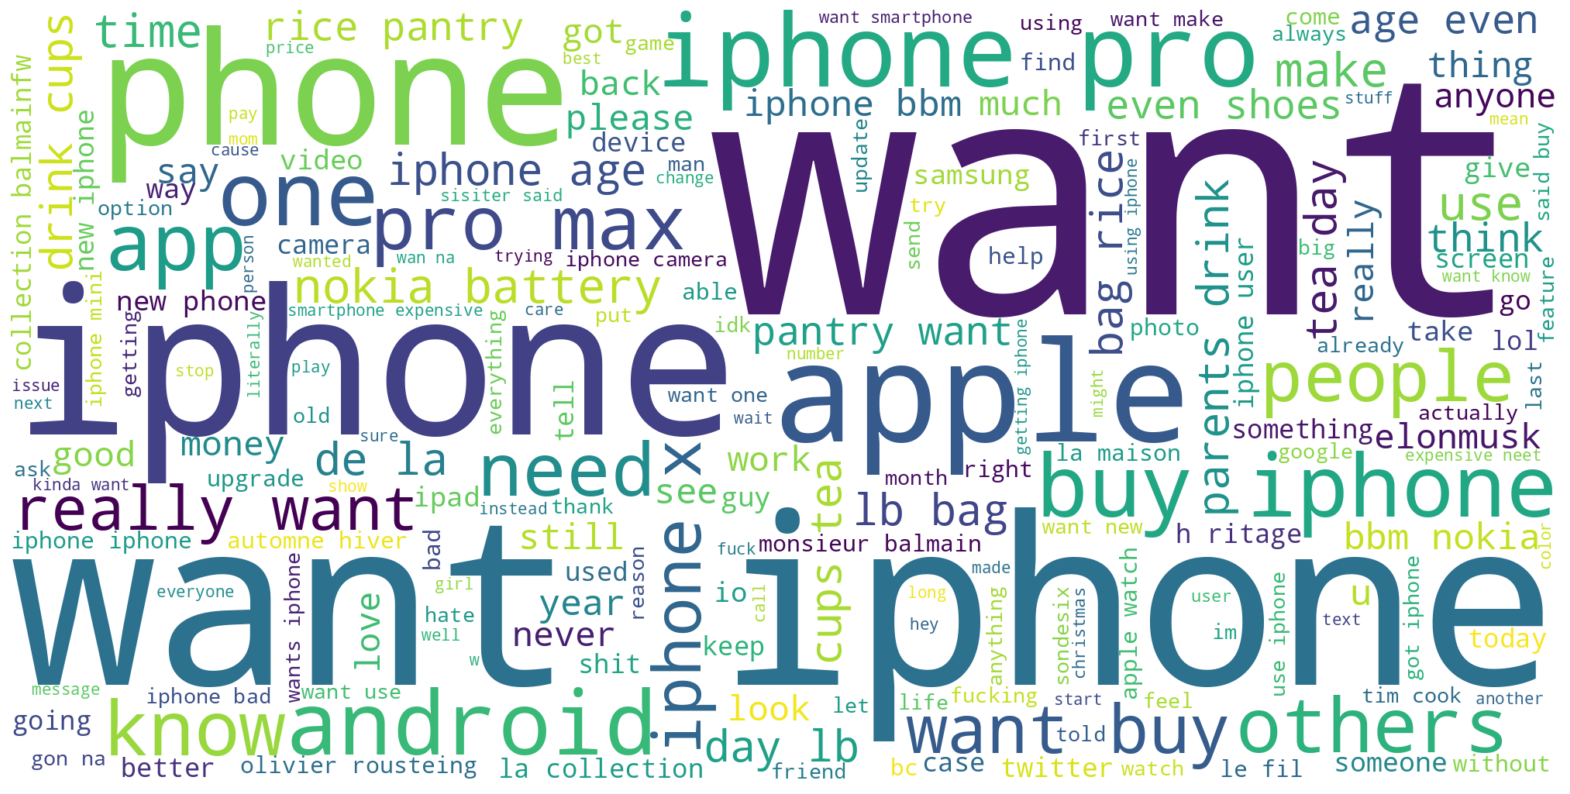

In [10]:
#Using wordcloud to visualize the comments

wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('plot23.png', dpi=400, bbox_inches='tight')
plt.show()


## III- Country and continent extraction first approach

### III-1 Country extraction

Assuming that the second part of the location after the "," is the country we can extract the country and then use a predefined algorithm to get the country.

In [11]:

#extraction of the country 
def extract_country(location):
    if isinstance(location, str):
        split_loc = location.split(',')
        if len(split_loc) > 1:
            return split_loc[1].strip()
        else:
            return location.strip()
    else:
        return np.nan
Users_data['country'] = Users_data['location'].apply(extract_country)

Users_data = Users_data[Users_data['country'].notna()]
Users_data.head()

,type,dateCreated,username,givenName,description,location,follows,friends,tweets,gender,country
2,ProfilePage,2008-09-24T21:15:31.000Z,romyilano,romy@mastodon.berlin,I like to build things,"Oakland, CA",1963,3357,100203,uknown,CA
4,ProfilePage,2017-12-02T10:56:56.000Z,correctBlogger,Your Favorite Online Tech Blogger..,Creative tech story teller and blogger @ https...,Places,829,754,8612,uknown,Places
6,ProfilePage,2022-12-08T17:03:22.000Z,oLemoN_TowNo,♡☆Ellie Semi IA☆♡,Call me Ellie!\n 13-15 \n~Any pronous~\nPatc...,Ur mom™,322,358,11776,male,Ur mom™
7,ProfilePage,2011-11-09T12:09:53.000Z,nashy_93,nash,🇦🇺🇬🇧 | she/her | 21+ | ur resident onee-san / ...,Australia,95,220,8358,uknown,Australia
8,ProfilePage,2021-03-12T01:17:16.000Z,tatarsundal,wine vigilante shit,mistress of whisperers in liberated parahyanga...,she/they,1304,424,10178,male,she/they


### III-2 Continent extraction

In [12]:

def my_convert(row):
    try:
      cn_code = pc.country_name_to_country_alpha2(row.country, cn_name_format='default')
      conti_code = pc.country_alpha2_to_continent_code(cn_code)
      return conti_code
    except:
      return np.nan
Users_data['continent'] = Users_data.apply(my_convert, axis = 1)
Users_data.head()



,type,dateCreated,username,givenName,description,location,follows,friends,tweets,gender,country,continent
2,ProfilePage,2008-09-24T21:15:31.000Z,romyilano,romy@mastodon.berlin,I like to build things,"Oakland, CA",1963,3357,100203,uknown,CA,NaN
4,ProfilePage,2017-12-02T10:56:56.000Z,correctBlogger,Your Favorite Online Tech Blogger..,Creative tech story teller and blogger @ https...,Places,829,754,8612,uknown,Places,NaN
6,ProfilePage,2022-12-08T17:03:22.000Z,oLemoN_TowNo,♡☆Ellie Semi IA☆♡,Call me Ellie!\n 13-15 \n~Any pronous~\nPatc...,Ur mom™,322,358,11776,male,Ur mom™,NaN
7,ProfilePage,2011-11-09T12:09:53.000Z,nashy_93,nash,🇦🇺🇬🇧 | she/her | 21+ | ur resident onee-san / ...,Australia,95,220,8358,uknown,Australia,OC
8,ProfilePage,2021-03-12T01:17:16.000Z,tatarsundal,wine vigilante shit,mistress of whisperers in liberated parahyanga...,she/they,1304,424,10178,male,she/they,NaN


How many continent we have identified.

In [13]:
continents = Users_data.groupby('continent').size()
continents

continent
AF    459
AS    263
EU    203
NA    551
OC     48
SA     25
dtype: int64

In [14]:
Users_data.head(20)

,type,dateCreated,username,givenName,description,location,follows,friends,tweets,gender,country,continent
2,ProfilePage,2008-09-24T21:15:31.000Z,romyilano,romy@mastodon.berlin,I like to build things,"Oakland, CA",1963,3357,100203,uknown,CA,NaN
4,ProfilePage,2017-12-02T10:56:56.000Z,correctBlogger,Your Favorite Online Tech Blogger..,Creative tech story teller and blogger @ https...,Places,829,754,8612,uknown,Places,NaN
6,ProfilePage,2022-12-08T17:03:22.000Z,oLemoN_TowNo,♡☆Ellie Semi IA☆♡,Call me Ellie!\n 13-15 \n~Any pronous~\nPatc...,Ur mom™,322,358,11776,male,Ur mom™,NaN
7,ProfilePage,2011-11-09T12:09:53.000Z,nashy_93,nash,🇦🇺🇬🇧 | she/her | 21+ | ur resident onee-san / ...,Australia,95,220,8358,uknown,Australia,OC
8,ProfilePage,2021-03-12T01:17:16.000Z,tatarsundal,wine vigilante shit,mistress of whisperers in liberated parahyanga...,she/they,1304,424,10178,male,she/they,NaN
9,ProfilePage,2020-03-23T01:25:57.000Z,Delightful_DD,Nash👑,"Future Management Consultant 💡, SLU 19 🎓, ♊️ ,...",Bahamas,550,412,9259,male,Bahamas,NA
10,ProfilePage,2014-04-06T14:49:27.000Z,btmukundu,Brian T Mukundu,"Let God, Let's Go.","Harare, Zimbabwe",271,1886,1388,uknown,Zimbabwe,AF
11,ProfilePage,2009-06-06T16:17:33.000Z,DrG9,"Ella Guastavino, MD",Pediatrician,"Englewood, Fl",4,14,390,male,Fl,NaN
12,ProfilePage,2021-05-01T12:03:18.000Z,ChrisCoolFX,ChrisCoolFX 💵,|| Jesus Christ || Chelsea FC 💙 || Forex Tradi...,"Greater Accra, Ghana",730,81,8787,uknown,Ghana,AF
13,ProfilePage,2013-01-15T07:44:11.000Z,UnicornPimpcess,Shaylee🦄,🦄 Inconsistent Twitch streamer and Affiliate/W...,South Wales,379,202,10327,uknown,South Wales,NaN


In [15]:
continent_NAs = Users_data["continent"].isnull().sum()
continent_NAs

5227


continent               count
AF           :          459
AS           :          263
EU           :          203
NA           :          551
OC           :          48
SA           :          25
MaN          :          5227

In [16]:
continents["Unknown"] = continent_NAs
continents

continent
AF          459
AS          263
EU          203
NA          551
OC           48
SA           25
Unknown    5227
dtype: int64

## III-3 Plotting our results

### III-3-1 Contient : using a prebuilt library 

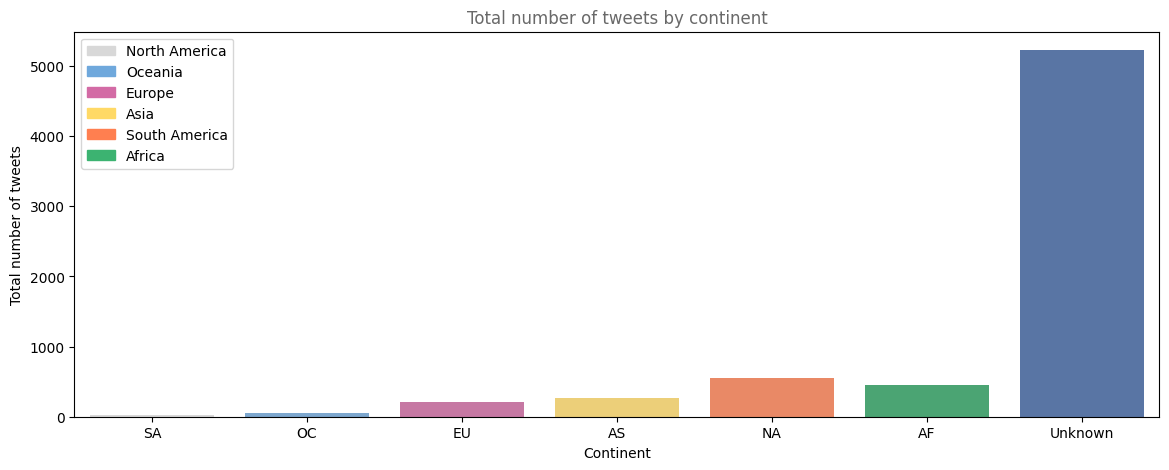

In [17]:
# Define color palette for each continent
colors = ['#d8d8d8', '#6fa8dc', '#d36ba5', '#ffd966', '#ff7f50', '#3cb371', '#4c72b0']

plt.figure(figsize=(14,5))
sns.barplot(x=['SA','OC','EU','AS','NA','AF','Unknown'], y=[continents[5],continents[4],continents[2],continents[1],continents[3],continents[0], continents[6]], palette=colors)
plt.ylabel('Total number of tweets')
plt.xlabel('Continent')
plt.title('Total number of tweets by continent', color='dimgrey')

# Create legend
legend_labels = ['North America', 'Oceania', 'Europe', 'Asia', 'South America', 'Africa']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels)

plt.show()

## IIII- country extraction : second approach -> building an algorithm

### IIII-1 Uploading a dataset contains all the cities, states, countries and continents to map our user location to a continent

In [19]:
city_state_country_continent = pd.read_csv('data/cities_countries_continents_continents.csv')


#### Look to our data

In [20]:
Users_data2.head(20)

,type,dateCreated,username,givenName,description,location,follows,friends,tweets,gender
0,ProfilePage,2017-09-17T00:21:27.000Z,spinachlsgna,biskita enthusiast,passionate about cars and destroying them for ...,NaN,29,404,1343,uknown
1,ProfilePage,2017-04-18T16:29:55.000Z,desifactsbot,Desifacts,Biryani,NaN,3,0,3769,uknown
2,ProfilePage,2008-09-24T21:15:31.000Z,romyilano,romy@mastodon.berlin,I like to build things,"Oakland, CA",1963,3357,100203,uknown
3,ProfilePage,2017-05-11T19:54:45.000Z,TierraHenson,🐼 Pandamonium,"Pro-CommonSense, Gamer, Otaku Nerd and Artist....",NaN,920,1571,48769,uknown
4,ProfilePage,2017-12-02T10:56:56.000Z,correctBlogger,Your Favorite Online Tech Blogger..,Creative tech story teller and blogger @ https...,Places,829,754,8612,uknown
5,ProfilePage,2012-10-31T18:10:50.000Z,andrechemist,Andre the Chemist,I teach students and am a terrible electrochem...,NaN,5884,495,25141,uknown
6,ProfilePage,2022-12-08T17:03:22.000Z,oLemoN_TowNo,♡☆Ellie Semi IA☆♡,Call me Ellie!\n 13-15 \n~Any pronous~\nPatc...,Ur mom™,322,358,11776,male
7,ProfilePage,2011-11-09T12:09:53.000Z,nashy_93,nash,🇦🇺🇬🇧 | she/her | 21+ | ur resident onee-san / ...,Australia,95,220,8358,uknown
8,ProfilePage,2021-03-12T01:17:16.000Z,tatarsundal,wine vigilante shit,mistress of whisperers in liberated parahyanga...,she/they,1304,424,10178,male
9,ProfilePage,2020-03-23T01:25:57.000Z,Delightful_DD,Nash👑,"Future Management Consultant 💡, SLU 19 🎓, ♊️ ,...",Bahamas,550,412,9259,male


#### Adding a function to remove all emogies and flags from the tweets 

in further analysis maybe it'll be worth it to look into the flags mentioned in the location to get the country of the user.

In [21]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

tweet = []
for i in range(0, len(Users_data2["location"])):
    Users_data2["location"][i] = remove_emoji(str(Users_data2["location"][i]))

/tmp/ipykernel_16744/55980584.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Users_data2["location"][i] = remove_emoji(str(Users_data2["location"][i]))


In [22]:
# let's look into our location variable 
Users_data2["location"]

0                        nan
1                        nan
2                Oakland, CA
3                        nan
4                     Places
                ...         
9655       they/them, he/him
9656                     nan
9657           they/she/he  
9658    Berkshire County, MA
9659         Gulf Shores, AL
Name: location, Length: 9660, dtype: object

### III-2 Our approach to get the continent based on the person location 
our results might be false since we didn't have the time to make a bulletproof algorithm.But it works just fine.

In [23]:
punctuation_to_remove_or_replace = "\"#$%&\'()*+-/<=>@[\\]^_`{|}~"

def getCountryContinent(location):

    if location == "":
        return "Unknown"
    else:
        punctuation_to_remove = "#$%&\"\'()*+-/<=>@[\\]^_`{|}~"

        # regular_punct = list(punctuation_to_remove)
        for punc in punctuation_to_remove:
            if punc in location:
                location = location.replace(punc, ',')
        location = location.strip()
        

        # split and remove leading/trailing whitespace
        values_name = [s.strip().title() for s in location.split(',')]

    if len(values_name) == 1:

        if len(values_name[0]) <= 3:
            values_name[0] = values_name[0].upper()
            country_row_sp = city_state_country_continent[city_state_country_continent["country_code"] == values_name[0]]
            country_continent_sp = country_row_sp['Continent_name'].values
            counter = Counter(country_continent_sp)
            try:
                most_common_string = counter.most_common(1)[0][0]
                return most_common_string
            except:
                pass
            
            # else:
            #     return 'none'
        else:
            try:
                country_row0 = city_state_country_continent[city_state_country_continent["country_name"].str.contains(values_name[0]) |
                                city_state_country_continent["state_name"].str.contains(values_name[0]) |
                                city_state_country_continent["city_name"].str.contains(values_name[0]) |
                                city_state_country_continent["country_code"].str.contains(values_name[0]) |
                                city_state_country_continent["state_code"].str.contains(values_name[0])]
                # retrieve the continent name for the France row
                country_continent = country_row0['Continent_name'].values

                counter = Counter(country_continent)
                most_common_string = counter.most_common(1)[0][0]
                return most_common_string
            except:
                pass
            
            # else:
            #     return 'none'

            

    elif len(values_name) == 2:
        if len(values_name[0]) <= 3:
            values_name[0] = values_name[0].upper()
            try:
                country_row_sp = city_state_country_continent[(city_state_country_continent["country_code"] == values_name[0]) | (city_state_country_continent["state_code"] == values_name[0])]
                country_continent_sp = country_row_sp['Continent_name'].values
                counter = Counter(country_continent_sp)
                try:
                    most_common_string = counter.most_common(1)[0][0]
                    return most_common_string
                except:
                    pass
                
                # else:
                #     return 'none'
            
            except:
                pass

            try:
                country_row_sp = city_state_country_continent[city_state_country_continent["state_code"] == values_name[0] | (city_state_country_continent["state_code"] == values_name[0])]
                country_continent_sp = country_row_sp['Continent_name'].values
                counter = Counter(country_continent_sp)
                try:
                    most_common_string = counter.most_common(1)[0][0]
                    return most_common_string
                except:
                    pass
                
                # else:
                #     return 'none'
            except:
                pass

        else:
            try:
                country_row0 = city_state_country_continent[city_state_country_continent["country_name"].str.contains(values_name[0]) |
                                city_state_country_continent["state_name"].str.contains(values_name[0]) |
                                city_state_country_continent["city_name"].str.contains(values_name[0]) |
                                city_state_country_continent["country_code"].str.contains(values_name[0]) |
                                city_state_country_continent["state_code"].str.contains(values_name[0])]

 

                # retrieve the continent name for the France row
                country_continent0 = country_row0['Continent_name'].values
               
                counter = Counter(country_continent0)
                
                most_common_string = counter.most_common(1)[0][0]
                return most_common_string
            except:
                pass
                
            # else:
            #     return 'none'
            

        if len(values_name[1]) <= 3:
            values_name[1] = values_name[1].upper()
            try:
                country_row_sp = city_state_country_continent[city_state_country_continent["state_code"] == values_name[1]]
                country_continent_sp = country_row_sp['Continent_name'].values
                counter = Counter(country_continent_sp)
                try:
                    most_common_string = counter.most_common(1)[0][0]
                    return most_common_string
                except:
                    pass
                
                # else:
                #     return 'none'
            except:
                pass
            
            try:
                country_row_sp = city_state_country_continent[city_state_country_continent["country_code"] == values_name[1]]
                country_continent_sp = country_row_sp['Continent_name'].values
                counter = Counter(country_continent_sp)
                
                most_common_string = counter.most_common(1)[0][0]
                return most_common_string
                
            except:
                pass
            # else:
            #     return 'none'

        else:
            try:
                country_row1 = city_state_country_continent[(city_state_country_continent["country_name"].str.contains(values_name[1]) |
                                    city_state_country_continent["state_name"].str.contains(values_name[1])) |
                                city_state_country_continent["city_name"].str.contains(values_name[1]) |
                                city_state_country_continent["country_code"].str.contains(values_name[1]) |
                                city_state_country_continent["state_code"].str.contains(values_name[1])]

                # retrieve the continent name for the France row
                country_continent1 = country_row1['Continent_name'].values

        
                counter = Counter(country_continent1)
                
                most_common_string = counter.most_common(1)[0][0]
                return most_common_string
            except:
                pass
            
            # else:
            #     return 'none'

    else:
        return "Not able to find it"

#### Let's get the continents 

In [24]:
continents = []

for i in Users_data2["location"]:
    continents.append(getCountryContinent(str(i)))

Text(0.5, 1.0, 'Percentage of Users by Region')

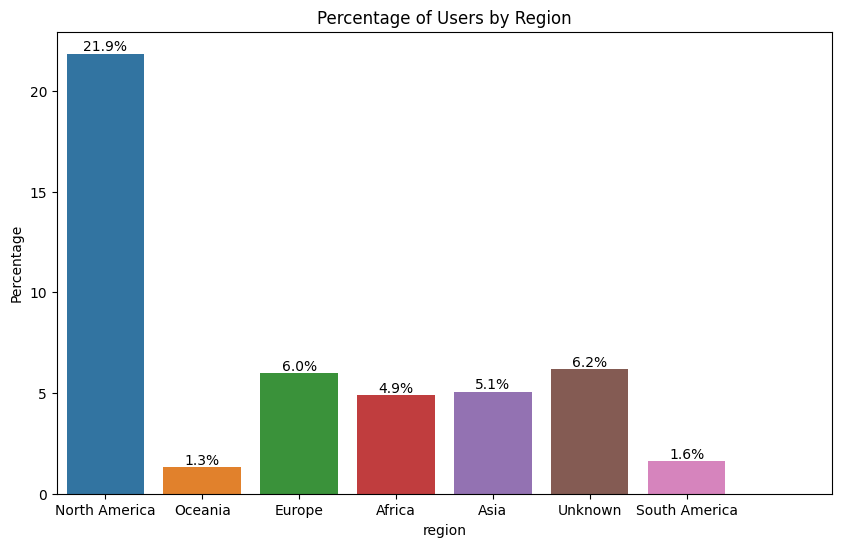

In [43]:
# Calculate total count
total_count = df['count'].sum()

# Calculate percentage for each region
df['percentage'] = df['count'] / total_count * 100

plt.figure(figsize=(10, 6))
# Create bar plot with percentage on y-axis
ax = sns.barplot(x='region', y='percentage', data=df)

# Add y-axis label
plt.ylabel('Percentage')

# Add percentage labels to bars
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set x-axis limits
plt.xlim(-0.5, len(df) - 0.5)

# title 

plt.title('Percentage of Users by Region')

## IV- plotting the gender estimation of our algorithm

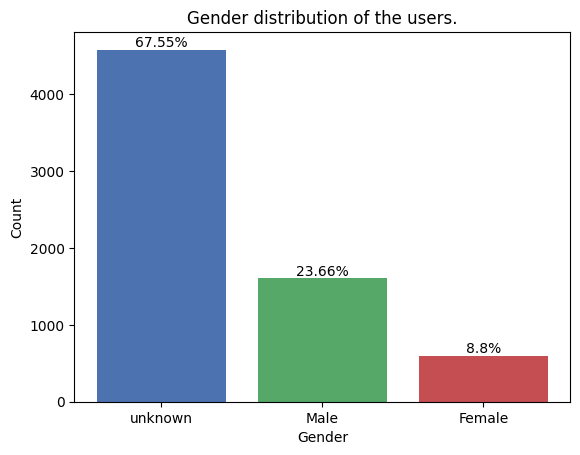

In [44]:
gender_val = Users_data.gender.value_counts()
total_users = len(Users_data)
gender_percentages = [100*count/total_users for count in gender_val]

plt.bar(['unknown', 'Male', 'Female'], gender_val)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender distribution of the users.") 
plt.bar(np.arange(3), gender_val, color=['#4c72b0', '#55a868', '#c44e52'])

# Add percentage annotations
for i, percentage in enumerate(gender_percentages):
    plt.annotate(str(round(percentage,2)) + '%', xy=(i, gender_val[i]), ha='center', va='bottom')
    
plt.show()